<a href="https://colab.research.google.com/github/adnaneaabbar/stock-trading-system/blob/master/AutomatedTradingStrategyGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
gs = pd.read_csv("https://raw.githubusercontent.com/adnaneaabbar/stock-trading-system/master/data/goldman_sachs.csv")
print(gs.head())
print(gs.tail())

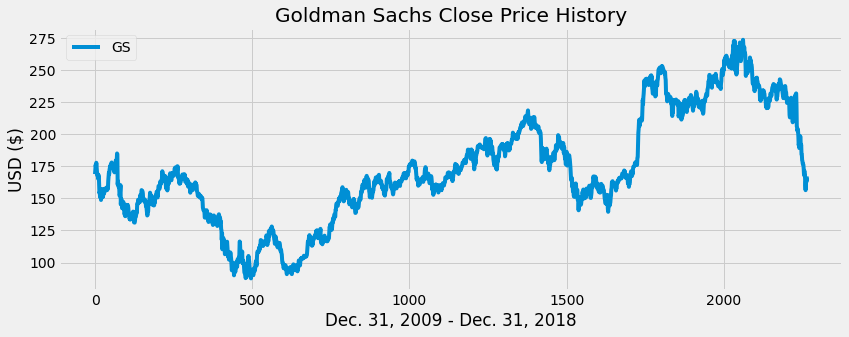

In [11]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(gs['Close'], label='GS')
plt.title('Goldman Sachs Close Price History')
plt.xlabel('Dec. 31, 2009 - Dec. 31, 2018')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

In [0]:
SMA30 = pd.DataFrame()
SMA30['Close'] = gs['Close'].rolling(30).mean()
SMA30

In [0]:
SMA100 = pd.DataFrame()
SMA100['Close'] = gs['Close'].rolling(100).mean()
SMA100

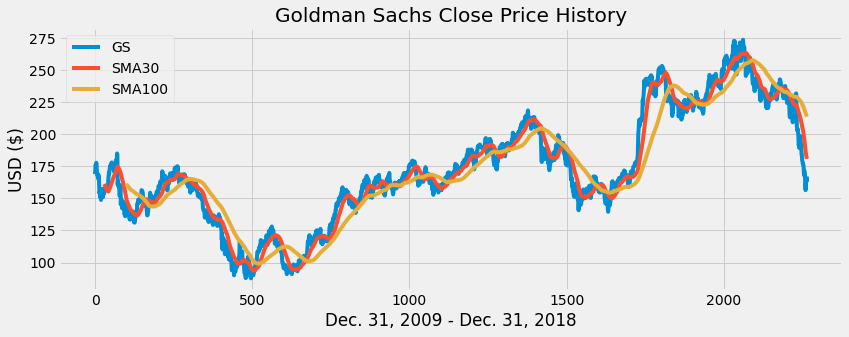

In [14]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(gs['Close'], label='GS')
plt.plot(SMA30['Close'], label="SMA30")
plt.plot(SMA100['Close'], label="SMA100")
plt.title('Goldman Sachs Close Price History')
plt.xlabel('Dec. 31, 2009 - Dec. 31, 2018')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

In [0]:
data = pd.DataFrame()
data['GS'] = gs['Close']
data['SMA30'] = gs['Close']
data['SMA100'] = gs['Close']
data

In [0]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['GS'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['GS'][i])
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy, sigPriceSell)


In [0]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[0]

In [0]:
data